In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score

from sktime.classification.distance_based import KNeighborsTimeSeriesClassifier

from modules.categorical_data_coding import code_data
from modules.model_runer import find_n_neighbors, test_model
from modules.classes_scatterplot import draw_classes_scatterplot

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('./prepared_datasets/quercetin_concentration_classification.csv')
df.head()

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_4991,f_4992,f_4993,f_4994,f_4995,f_4996,f_4997,f_4998,f_4999,target
0,12.635397,13.077894,13.062591,12.894789,12.650586,12.711683,12.360680,12.925277,13.398274,13.535571,...,13.231437,13.399334,13.155131,13.643429,13.521326,13.353523,13.704420,14.391117,13.735014,NO_Que
1,12.651611,13.124609,13.612906,13.597603,13.216200,13.444997,13.246694,12.010691,12.575289,12.865186,...,12.774651,13.583349,13.018846,12.622043,13.003540,13.232437,12.988234,13.064531,12.866229,NO_Que
2,12.942526,13.339223,12.881420,12.606817,12.957714,12.957711,12.789909,12.469406,13.049303,13.095100,...,13.462266,13.447063,12.897760,12.897757,13.569054,12.897751,12.745149,12.928246,13.035043,NO_Que
3,12.912940,13.035037,12.638334,12.577231,12.592529,13.248626,13.111323,13.065520,13.660617,13.660614,...,13.371680,13.432777,13.631074,13.585371,13.035969,12.730866,13.570063,14.592360,14.104157,NO_Que
4,13.310654,13.371651,13.997249,14.210946,13.798943,13.936240,13.539537,13.646334,13.463231,13.264829,...,13.494794,13.250591,12.930189,12.701286,12.518183,13.036980,13.632077,13.235374,13.143771,NO_Que


In [4]:
code_data(df, 'target')
df.head()

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_4991,f_4992,f_4993,f_4994,f_4995,f_4996,f_4997,f_4998,f_4999,target
0,12.635397,13.077894,13.062591,12.894789,12.650586,12.711683,12.360680,12.925277,13.398274,13.535571,...,13.231437,13.399334,13.155131,13.643429,13.521326,13.353523,13.704420,14.391117,13.735014,0
1,12.651611,13.124609,13.612906,13.597603,13.216200,13.444997,13.246694,12.010691,12.575289,12.865186,...,12.774651,13.583349,13.018846,12.622043,13.003540,13.232437,12.988234,13.064531,12.866229,0
2,12.942526,13.339223,12.881420,12.606817,12.957714,12.957711,12.789909,12.469406,13.049303,13.095100,...,13.462266,13.447063,12.897760,12.897757,13.569054,12.897751,12.745149,12.928246,13.035043,0
3,12.912940,13.035037,12.638334,12.577231,12.592529,13.248626,13.111323,13.065520,13.660617,13.660614,...,13.371680,13.432777,13.631074,13.585371,13.035969,12.730866,13.570063,14.592360,14.104157,0
4,13.310654,13.371651,13.997249,14.210946,13.798943,13.936240,13.539537,13.646334,13.463231,13.264829,...,13.494794,13.250591,12.930189,12.701286,12.518183,13.036980,13.632077,13.235374,13.143771,0


# Distance-based algorithms

In [5]:
scaler = MinMaxScaler()

In [6]:
distance_based_df = scaler.fit_transform(df.values)
distance_based_df = pd.DataFrame(distance_based_df)
distance_based_df.columns = df.columns
distance_based_df

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_4991,f_4992,f_4993,f_4994,f_4995,f_4996,f_4997,f_4998,f_4999,target
0,0.183309,0.186687,0.187205,0.183287,0.188252,0.184973,0.174496,0.188504,0.190634,0.203206,...,0.194373,0.195839,0.190456,0.199567,0.193027,0.187649,0.203624,0.210831,0.207732,0.0
1,0.183646,0.187646,0.198571,0.197868,0.199897,0.200085,0.192764,0.169504,0.173372,0.189272,...,0.185014,0.199640,0.187640,0.178430,0.182275,0.185154,0.188761,0.183722,0.190034,0.0
2,0.189681,0.192051,0.183463,0.177313,0.194576,0.190043,0.183346,0.179033,0.183315,0.194051,...,0.199103,0.196825,0.185138,0.184136,0.194018,0.178255,0.183716,0.180937,0.193473,0.0
3,0.189067,0.185807,0.178442,0.176699,0.187057,0.196038,0.189973,0.191418,0.196137,0.205805,...,0.197247,0.196530,0.200289,0.198366,0.182949,0.174815,0.200836,0.214944,0.215251,0.0
4,0.197318,0.192716,0.206510,0.210592,0.211895,0.210208,0.198802,0.203484,0.191997,0.197579,...,0.199769,0.192767,0.185808,0.180070,0.172197,0.181125,0.202123,0.187214,0.195688,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10695,0.618932,0.581351,0.563241,0.586632,0.609258,0.629958,0.617188,0.603182,0.592333,0.601589,...,0.584001,0.595904,0.609518,0.602886,0.593608,0.599745,0.608724,0.586029,0.580810,1.0
10696,0.587971,0.584231,0.603014,0.603788,0.587329,0.570904,0.582958,0.596586,0.597195,0.595623,...,0.446501,0.538600,0.587511,0.596001,0.602542,0.591631,0.618287,0.602616,0.605737,1.0
10697,0.545930,0.545770,0.581330,0.592137,0.565086,0.575053,0.597176,0.599501,0.593418,0.610593,...,0.379344,0.388628,0.399362,0.394286,0.396017,0.386942,0.371665,0.370686,0.394744,1.0
10698,0.390564,0.376394,0.370544,0.370603,0.394877,0.396192,0.387081,0.412851,0.393133,0.390236,...,0.600128,0.599556,0.576916,0.598651,0.616290,0.632641,0.643110,0.606794,0.592804,1.0


In [7]:
X, y = np.array(distance_based_df.drop('target', axis=1)), np.array(df['target'])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## k-Nearest Neighbors with Dynamic Time Warping

In [9]:
knn_dtw = KNeighborsTimeSeriesClassifier(distance='dtw')

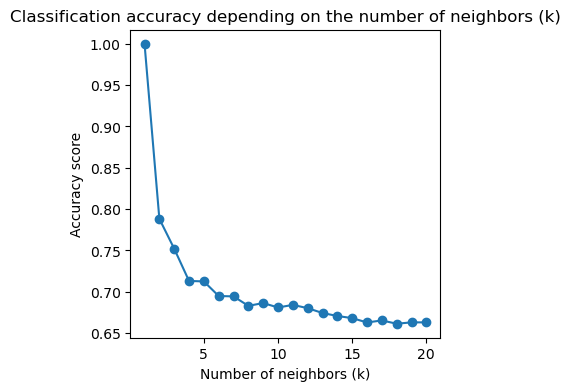

In [10]:
find_n_neighbors(knn_dtw, X_train, y_train, 5)

In [11]:
knn_dtw.set_params(n_neighbors=3)

KNeighborsClassifier(n_neighbors=3)

 CV Scores: [0.63130841 0.63411215 0.6271028  0.64252336]
 CV Mean score: 0.6337616822429907


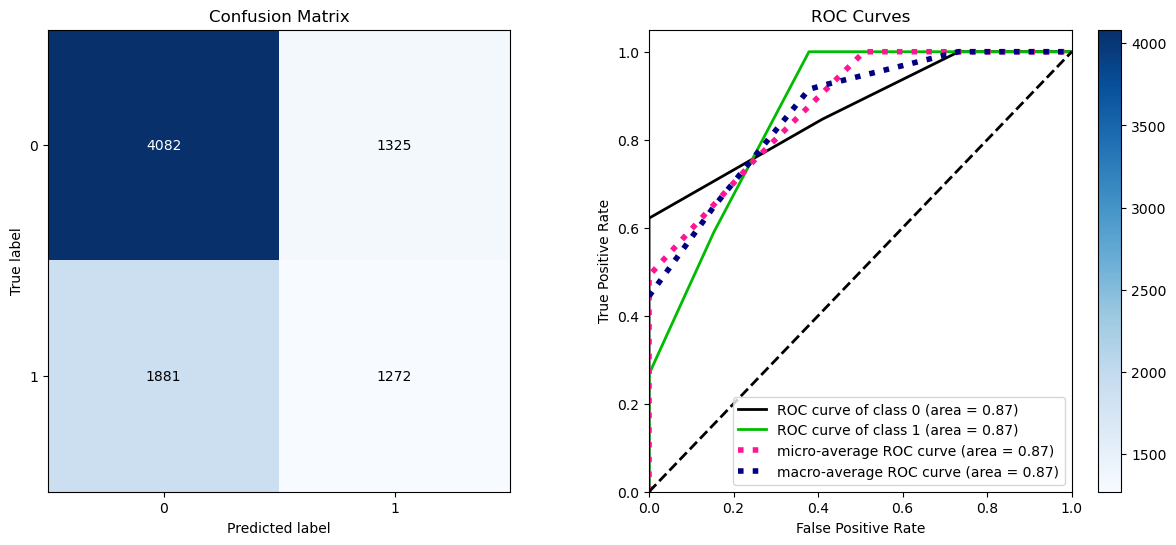

In [12]:
test_model(knn_dtw, X_train, y_train)

In [13]:
knn_dtw.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [14]:
knn_dtwpred = knn_dtw.predict(X_test)

In [15]:
f1_score(knn_dtw_pred, y_test)

0.4332603938730854

In [16]:
accuracy_score(knn_dtw_pred, y_test)

0.6369158878504673

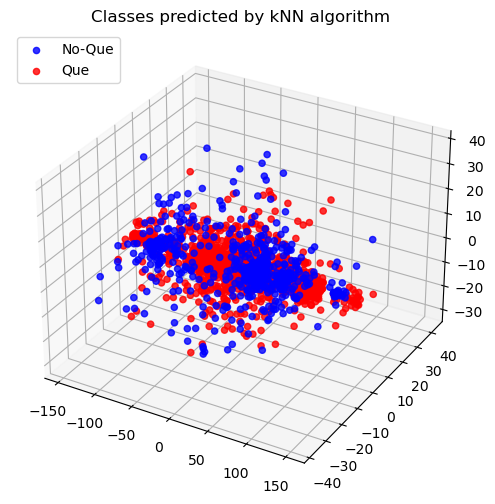

In [17]:
draw_classes_scatterplot(X_test, knn_dtw_pred, "Classes predicted by kNN + DTW algorithm",
                         ["0% Que", "10% Que", "100% Que"], ["blue", "red", "green"])